<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файла-и-изучение-данных" data-toc-modified-id="Открытие-файла-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-файла-и-изучение-его-структуры" data-toc-modified-id="Открытие-файла-и-изучение-его-структуры-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файла и изучение его структуры</a></span></li><li><span><a href="#Изменение-типов-данных-и-проверка-на-наличие-дубликатов" data-toc-modified-id="Изменение-типов-данных-и-проверка-на-наличие-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изменение типов данных и проверка на наличие дубликатов</a></span></li><li><span><a href="#Изучение-выборки" data-toc-modified-id="Изучение-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение выборки</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-построению-моделей" data-toc-modified-id="Подготовка-данных-к-построению-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных к построению моделей</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на тарифы "Смарт" или "Ультра". Нужно построить модель для задачи классификации, которая выберет подходящий тариф для каждого пользователя.

Необходимо построить модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. 

Каждая строчка в датасете является информацией о поведении одного пользователя за месяц. В базе данных присутствуют следующие столбцы:  
  
`сalls` — количество звонков,  
`minutes` — суммарная длительность звонков в минутах,  
`messages` — количество sms-сообщений,  
`mb_used` — израсходованный интернет-трафик в Мб,  
`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Открытие файла и изучение данных

### Открытие файла и изучение его структуры

In [1]:
# Импорт библиотек

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
# Избавимся от предупреждений

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Выведем общую информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


В датасете 3214 строчек о пользователях и 5 столбцов, по которым записи о клиентах сравниваются. Пропущенных значений нет

In [5]:
# Выведем первые 5 строчек датасета, чтобы посмотреть на его структуру

data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### Изменение типов данных и проверка на наличие дубликатов

Нужно изменить тип данных в столбцах `calls` и `messages`, так как в них могут находится только целочисленные значения

In [6]:
data['calls'] = data['calls'].astype('int64')
data['messages'] = data['messages'].astype('int64')

#data.info()

In [7]:
# Проверим датасет на наличие дубликатов

data.duplicated().sum()

0

Дубликатов не обнаружено

### Изучение выборки

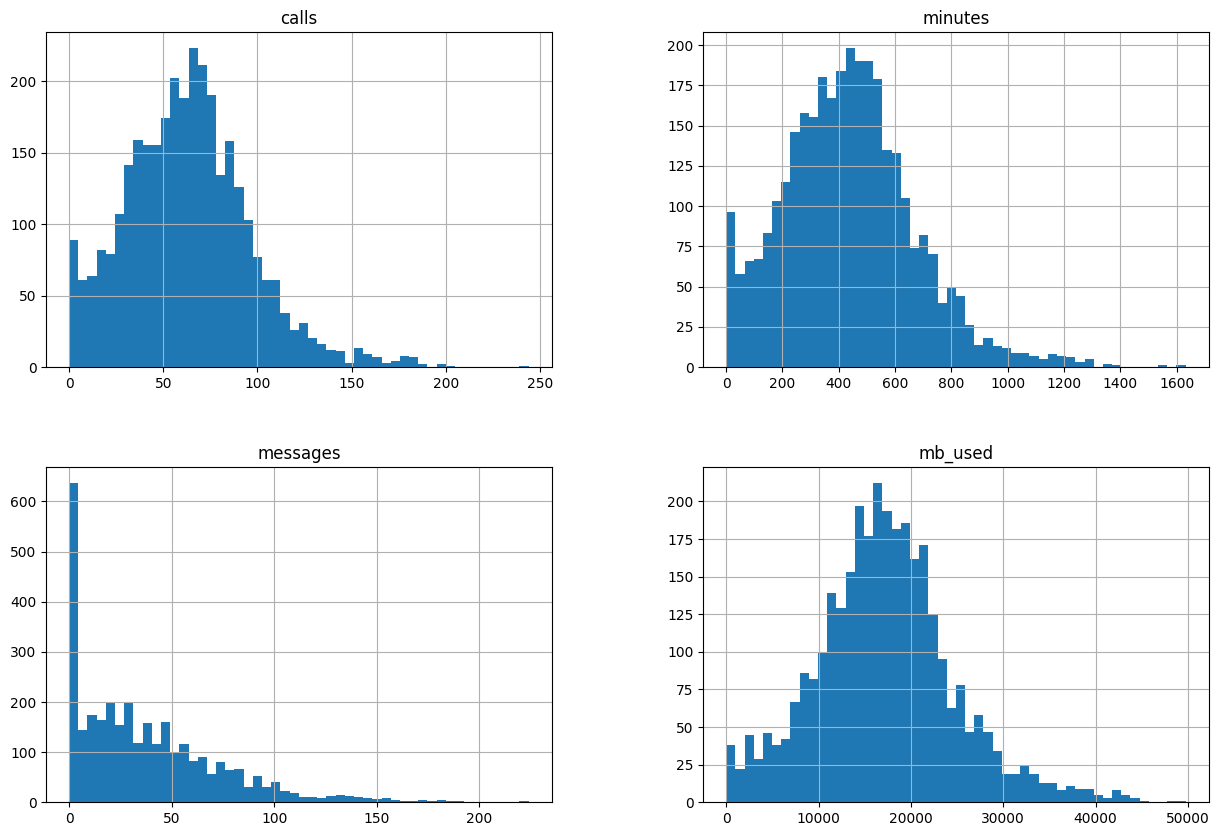

In [8]:
data[['calls', 'minutes', 'messages', 'mb_used']].hist(figsize=(15, 10), bins=50);

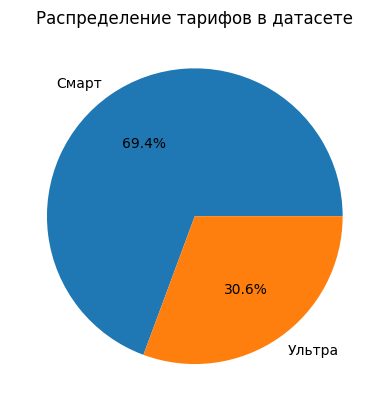

In [9]:
data['is_ultra'].value_counts().plot(kind='pie', labels=['Смарт', 'Ультра'], autopct='%1.1f%%')
plt.ylabel('')
plt.title('Распределение тарифов в датасете')
plt.show()

По построенным диаграммам можно заметить, что распределение значений в стобцах `calls`, `minutes` и `mb_used` напоминает пуассоновское. Также, в выборке присутствует больше пользователей тарифа "Смарт"

In [10]:
data.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


Как можно заметить из корреляционной матрицы, присутствует сильная положительная линейная зависимость между `calls` и `minutes`. Чтобы в дальнейшем при построении модели не возникло ошибок из-за данной зависимости, построим новый параметр - `minutes_per_call`, который будет показывать среднее количество минут за один звонок пользователя

In [11]:
data['minutes_per_call'] = data['minutes'] / data['calls']

# Так как в выборке могли быть нули в столбце 'calls', заполним пропуски в новом столбце нулями
data['minutes_per_call'] = data['minutes_per_call'].fillna(value=0)

# data.head()

## Подготовка данных к построению моделей

Для начала необходимо разделить признаки на целевой - **target**, и остальные - **features**. В нашей задаче нам необходимо построить модель для выбора наиболее подходящего тарифа. Значит, столбец `is_ultra` будет являться целевым признаком, а столбцы `calls`, `minutes`, `messages` и `mb_used` - остальными

In [12]:
features = data.drop(['is_ultra', 'minutes', 'calls'], axis=1)
#features.shape

target = data['is_ultra']
#target.shape

Разобьем данные на **обучающую выборку** в размере 60% от всего датасета, **валидационную выборку** в размере 20% от всех данных и **тестовую выборку**, составляющую 20% от всей доступной базы данных. Так как в датасете присутствует сильное различие между количеством пользователей тарифов, нам нужно сохранить примерно такое же разбиение в обучающей, тестовой и валидационных выборках

In [13]:
# Разделим выборку на тренировочную и вылидационную
features_train, features_valid, target_train, target_valid = (
    train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
)

# Разделим валидационную выборку на валидационную и тестовую
features_valid, features_test, target_valid, target_test = (
    train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345, 
                     stratify=target_valid)
)

#target_train.value_counts() / len(target_train)
#target_valid.value_counts() / len(target_valid)
#target_test.value_counts() / len(target_test)

## Построение моделей

Так как нам нужно предсказать, какой тариф больше подойдет пользователю, перед нами стоит задача классификации. Исследуем три модели:  
- Дерево решений
- Случайный лес
- Логистическая регрессия

### Decision Tree Classifier

In [14]:
best_model_tree = None
best_depth = 0
best_accuracy_tree = 0

tree_train_accuracy_list = []
tree_valid_accuracy_list = []
tree_depth_list = list(range(1, 11))

for depth in range(1, 11):
    
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    
    tree_predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, tree_predictions_valid)
    tree_valid_accuracy_list.append(accuracy)
    
    tree_predictions_train = model.predict(features_train)
    accuracy_train = accuracy_score(target_train, tree_predictions_train)
    tree_train_accuracy_list.append(accuracy_train)
    
    if accuracy > best_accuracy_tree:
        best_model_tree = model
        best_depth = depth
        best_accuracy_tree = accuracy
        
print(f'Лучший результат модели дерева решений:\nГлубина - {best_depth}\n'
      f'Точность - {best_accuracy_tree}')

Лучший результат модели дерева решений:
Глубина - 5
Точность - 0.7776049766718507


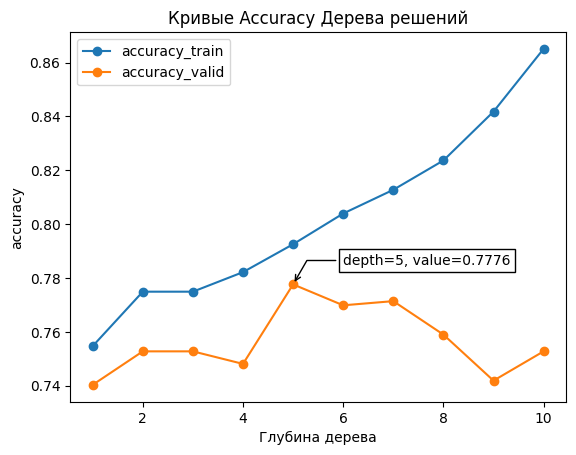

In [15]:
plt.plot(tree_depth_list, tree_train_accuracy_list, linestyle='-', marker='o')
plt.plot(tree_depth_list, tree_valid_accuracy_list, linestyle='-', marker='o')
plt.legend(['accuracy_train', 'accuracy_valid'])

text = f'depth={best_depth}, value={best_accuracy_tree.round(4)}'
box_properties = dict(boxstyle='square,pad=0.3', fc='white')
arrow_properties = dict(arrowstyle='->', connectionstyle='angle,angleA=0,angleB=60')

plt.ylabel('accuracy')
plt.xlabel('Глубина дерева')
plt.title('Кривые Accuracy Дерева решений')

plt.annotate(text, xy=(best_depth, best_accuracy_tree), xytext=(6, 0.785), bbox=box_properties, 
            arrowprops=arrow_properties)
plt.show()

### Random Forest Classifier

In [16]:
best_model_forest = None
best_accuracy_forest = 0
best_depth_forest = 0
best_est_forest = 0

forest_train_accuracy_list = []
forest_valid_accuracy_list = []
forest_depth_list = list(range(1, 20))

for est in range(10, 51, 10):
    for depth in range(1, 20):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        
        forest_predictions_valid = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, forest_predictions_valid)
        
        if accuracy > best_accuracy_forest:
            best_model_forest = model
            best_depth_forest = depth
            best_est_forest = est
            best_accuracy_forest = accuracy
            forest_valid_accuracy_list = forest_est_list
            
print(f'Лучший результат модели случайного леса:\nГлубина - {best_depth_forest}\n'
      f'Число деревьев в случайном лесу - {best_est_forest}\nТочность - {best_accuracy_forest}')

Лучший результат модели случайного леса:
Глубина - 18
Число деревьев в случайном лесу - 40
Точность - 0.7822706065318819


### Logistic Regression

In [17]:
model = LogisticRegression(random_state=12345, max_iter=1000)
model.fit(features_train, target_train)
regression_predictions_valid = model.predict(features_valid)
accuracy_regression = accuracy_score(target_valid, regression_predictions_valid)

print(f'Лучший результат модели логистической регрессии:\nТочность - {accuracy_regression}')

Лучший результат модели логистической регрессии:
Точность - 0.7200622083981337


**Случайный лес** дал лучший результат точности на валидационной выборке

## Проверка модели на тестовой выборке

### Random Forest Classifier

In [18]:
forest_test_predictions = best_model_forest.predict(features_test)
forest_accuracy = accuracy_score(target_test, forest_test_predictions)

print(f'Точность модели случайного леса на тестовой выборке - {forest_accuracy}')

Точность модели случайного леса на тестовой выборке - 0.7791601866251944


Модель случайного леса дала примерно такую же точность на тестовой выборке. Значит, модель не склонна к переобучению. Также, была достигнута желаемая точность (больше 0.75)

## Проверка модели на адекватность

Для проверки модели случайного леса на адекватоность, мы сравним результат точности модели с точностью модели, построенной с помощью метода `DummyClassifier`, которая строит прогнозы, используя самые простые связи. Соответственно, если модель случайного леса дает адекватные прогнозы, то ее точность должна быть выше, чем точность модели `DummyClassifier`

In [19]:
# Построим модель DummyClassifier и посчитаем ее точность на валидационной выборке
dummy_model = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy_model.fit(features_train, target_train)
dummy_predictions_valid = dummy_model.predict(features_valid)
accuracy_dummy = accuracy_score(target_valid, dummy_predictions_valid)

# Выведем точность модели DummyClassifier на экран
print(f'Точность модели DummyClassifier - {accuracy_dummy}')

# Сравним точность модели DummyClassifier с точностью модели случайного леса 
# на валидационной выборке
if accuracy_dummy > best_accuracy_forest:
    print('Модель случайного дерева дает неточные результаты по сравнению с самой простой моделью'
         'DummyClassifier')
elif accuracy_dummy < best_accuracy_forest:
    print('Модель случайного дерева дает адекватные результаты')
else:
    print('Модели случайного леса и DummyClassifier дают одинаковую точность. Лучше выбрать '
          'другую модель')

Точность модели DummyClassifier - 0.6936236391912908
Модель случайного дерева дает адекватные результаты


## Вывод

Целью данного проекта было выработать модель для предложения пользователям оптимального тарифа: "Смарт" или "Ультра".  
  
Сначала, мы сделали предобработку данных, а именно:
- Открыли файл, изучили информацию о нем и его общую структуру
- Изменили тип данных в некоторых столбцах
- Проверили датасет на наличие дубликатов
- Изучили распределение признаков в датасете и построили графики
  
Далее мы разделили выборку на тренировочную, валидационную и тестовую, используя стратификацию для сохранения первоначального соотношения тарифов в датасете. Так как перед нами стояла задача классификации, мы рассмотрели три модели, а именно:
- Дерево решений
- Случайный лес
- Логистическая регрессия  
  
Сравнив их точность на валидационной выборке, мы выбрали модель случайного леса в качестве наилучшей, так как она приносила наибольший accuracy - примерно `0.78`. Подобранные гиперпараметры: 40 деревьев с глубиной 18. На тестовой выборке точность модели случайного леса составила примерно `0.779`, что не сильно отличается от результата на валидационной выборке.  
  
Также, мы проверили модель случайного леса на адекватность, сравнив ее точность с результатом модели DummyClassifier. Так как точность модели случайного леса оказалась выше, мы сделали вывод, что модель дает адекватные результаты. 
  
Подводя итоги, мы построили модель случайного леса, подобрав нужные гиперпараметры, и добились максимальной доли правильных ответов - около `0.779-0.78`. Модель не склонна к переобучению, так как точность на валидационной и тестовой выборках примерно одинаковая. Также, построенная модель адекватна.